In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import pandas as pd
import numpy as np
import gurobipy as gp
from gurobipy import *
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
### Importing Dataset

data = pd.read_csv('test.csv')

In [3]:
### Data Exploration

data.head()

,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3370464 entries, 0 to 3370463
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   id           int64 
 1   date         object
 2   store_nbr    int64 
 3   item_nbr     int64 
 4   onpromotion  bool  
dtypes: bool(1), int64(3), object(1)
memory usage: 106.1+ MB


In [5]:
data.describe()

,id,store_nbr,item_nbr
count,3.370464e+06,3.370464e+06,3.370464e+06
mean,1.271823e+08,2.750000e+01,1.244798e+06
std,9.729693e+05,1.558579e+01,5.898362e+05
min,1.254970e+08,1.000000e+00,9.699500e+04
25%,1.263397e+08,1.400000e+01,8.053210e+05
50%,1.271823e+08,2.750000e+01,1.294665e+06
75%,1.280249e+08,4.100000e+01,1.730015e+06
max,1.288675e+08,5.400000e+01,2.134244e+06


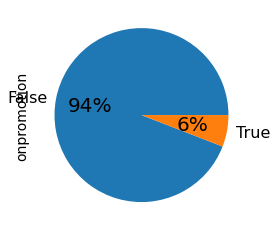

In [6]:
def pie_col(column):
  data[column].value_counts().plot.pie(autopct='%1.0f%%')

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 7
import matplotlib as mpl
mpl.rcParams['font.size'] = 20

pie_col('onpromotion')
